<a href="https://colab.research.google.com/github/Shrinidhiimani/Shrinidhiimani/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4. Physics Simulation


$\color{red}{\text{Please do not use any other Python packages except the ones given in the example codes.}}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Q.1 [20 pts] **Ball Bouncing Simulation**
<img src="https://github.com/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Figures/bouncing_ball.png?raw=true" width="400">

## **Q.1 (a) [10pts] Make a simulation of the a bouncing ball using the parameters:**
\begin{align}
m &=1kg, p_0=(0, 1.5), v_0=(0.3, -0.1), \gamma=0.8,
\end{align}
where $p_0$ and $v_0$ are the initial position and velocity, respectively. $\gamma$ is the coefficient of restitution of the ball. Use simulation time step, $\Delta t=0.001$ sec. Compute the movements of the bouncing ball for 3 sec. (Note: No frictional loss)

In [2]:
def simulate_ball(mass, coeff_rest, init_pos, init_vel, delta_t, N=3000):
  g = -9.8
  p_hist = np.zeros((N, 2))
  v_hist = np.zeros((N, 2))
  t_hist = np.zeros(N)
  p_hist[0, :] = init_pos
  v_hist[0, :] = init_vel
  for i in range(1, N):
      # Write your code
      a = np.array([0, g]);
      v_hist[i, :] = v_hist[i-1, :] + a*delta_t;

      if p_hist[i-1, 1]<=0 and v_hist[i, 1]<0:
         v_hist[i, 1] = -v_hist[i, 1]*coeff_rest

      p_hist[i, :] = p_hist[i-1, :] + v_hist[i, :]*delta_t;
      t_hist[i] = i*delta_t;
      # ..........
  return p_hist, v_hist, t_hist

In [5]:
# Write your code: set up proper parameters and initial state to call the 'simulate_ball' function

mass = 1.0  # kg
coeff_rest = 0.8  # coefficient of restitution (gamma)
init_pos = np.array([0, 1.5])  # initial position (x, y)
init_vel = np.array([0.3, -0.1])  # initial velocity (vx, vy)
delta_t = 0.001  # time step in seconds
N = 3000 # number of steps for 3 seconds (3/0.001)
# .....
[p_hist, v_hist, t_hist] = simulate_ball(mass, coeff_rest, init_pos, init_vel, delta_t, N)

In [6]:
# Bouncing ball visualization: No need to change
def plot_bouncingball(p_history, t_history, num_frames= 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)
  wall1, = ax.plot([-2, 2], [0, 0], 'b', lw=1)
  ball, = ax.plot([0], [0], 'ro', markersize=12)

  txt_title = ax.set_title('')

  ax.set_xlim(( -1.5, 1.5))
  ax.set_ylim((-0.5, 2.5))
  txt_title = ax.set_title('')
  interval = len(p_history)//num_frames
  def drawFrame(k):
    k = interval*k
    p0 = p_history[k]

    ball.set_data([p0[0]], [p0[1]])
    txt_title.set_text('t = {:.2f} sec'.format(t_history[k]))
    return ball,
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [7]:
# Animation code (No need to change)
anim = plot_bouncingball(p_hist, t_hist, num_frames= 100)
plt.close()
HTML(anim.to_html5_video())

# writervideo = animation.FFMpegWriter(fps=60)
# anim.save('ballbounding.mp4', writer=writervideo)

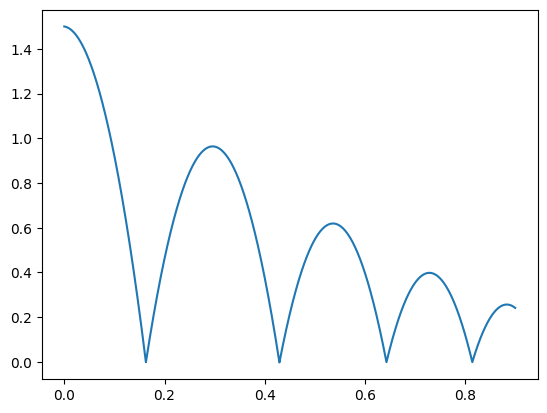

In [8]:
# No need to change
plt.plot(p_hist[:, 0], p_hist[:, 1])
plt.show()

##Q.1(b) [5 pts] **What is the position and velocity of the ball after 1sec and 2 sec ?**

In [9]:
# Write your code: Print the position and velocity at 1 sec and 2 sec
index_1sec = int(1.0 / delta_t)  # index at t = 1 sec
index_2sec = int(2.0 / delta_t)  # index at t = 2 sec

print("At t = 1.0 sec:")
print(f"  Position: ({p_hist[index_1sec, 0]:.4f}, {p_hist[index_1sec, 1]:.4f}) m")
print(f"  Velocity: ({v_hist[index_1sec, 0]:.4f}, {v_hist[index_1sec, 1]:.4f}) m/s")
print()
print("At t = 2.0 sec:")
print(f"  Position: ({p_hist[index_2sec, 0]:.4f}, {p_hist[index_2sec, 1]:.4f}) m")
print(f"  Velocity: ({v_hist[index_2sec, 0]:.4f}, {v_hist[index_2sec, 1]:.4f}) m/s")
#...

At t = 1.0 sec:
  Position: (0.3000, 0.9628) m
  Velocity: (0.3000, -0.1238) m/s

At t = 2.0 sec:
  Position: (0.6000, 0.3970) m
  Velocity: (0.3000, -2.0804) m/s


##Q.1(c) [5 pts] **What is the position and velocity of the ball after 2 sec when you use $\Delta_t=0.01$? Explain why the values are different from the result of (a). Put your answers in the following text box.**

At t = 2.0 sec (with Δt = 0.01):
  Position: (0.6000, 0.5105) m
  Velocity: (0.3000, -1.6712) m/s

Comparison with Δt = 0.001:
  Position: (0.6000, 0.3970) m
  Velocity: (0.3000, -2.0804) m/s


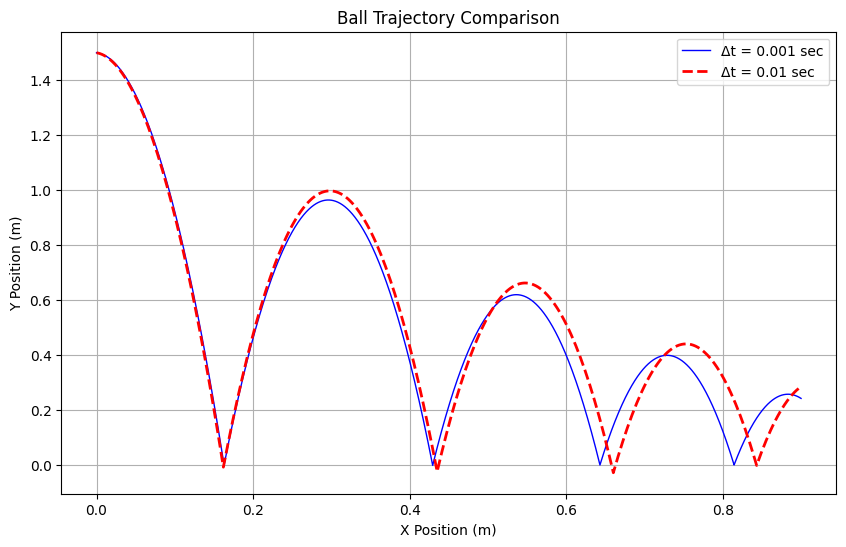

In [10]:
# Write your code:
# 1)Simulate the bouncing ball again with new delta
# 2) Print the position and velocity at 2 sec
# 3) plot the trajectories along with the previous one
#...
delta_t_large = 0.01  # new time step
N_large = 300  # number of steps for 3 seconds (3/0.01)

[p_hist_large, v_hist_large, t_hist_large] = simulate_ball(
    mass, coeff_rest, init_pos, init_vel, delta_t_large, N_large
)

index_2sec_large = int(2.0 / delta_t_large)

print("At t = 2.0 sec (with Δt = 0.01):")
print(f"  Position: ({p_hist_large[index_2sec_large, 0]:.4f}, {p_hist_large[index_2sec_large, 1]:.4f}) m")
print(f"  Velocity: ({v_hist_large[index_2sec_large, 0]:.4f}, {v_hist_large[index_2sec_large, 1]:.4f}) m/s")
print()
print("Comparison with Δt = 0.001:")
print(f"  Position: ({p_hist[index_2sec, 0]:.4f}, {p_hist[index_2sec, 1]:.4f}) m")
print(f"  Velocity: ({v_hist[index_2sec, 0]:.4f}, {v_hist[index_2sec, 1]:.4f}) m/s")

plt.figure(figsize=(10, 6))
plt.plot(p_hist[:, 0], p_hist[:, 1], 'b-', label='Δt = 0.001 sec', linewidth=1)
plt.plot(p_hist_large[:, 0], p_hist_large[:, 1], 'r--', label='Δt = 0.01 sec', linewidth=2)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Ball Trajectory Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Q.1 (c) Write your explanation here:

The position and velocity values are different between the two simulations because of numerical integration errors. When the time step dt is 0.01 seconds (which is 10 times bigger than 0.001), the simulation becomes less accurate. A larger time step means the program skips over more points in time, so it might not catch the exact moment when the ball hits the ground. It also increases the truncation error in the Euler method (which depends on dt²) and makes energy conservation during the bounces worse. These small errors build up over time, so the results start to drift apart. Using a smaller time step gives a more accurate simulation, but it also takes more computation time.

# Q.2 [40 pts] **Pinball Simulation**
<img src="https://github.com/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Figures/pinball.png?raw=true" width="500">

In [11]:
# Wall definition code: No need to change
wall1 = np.array([[0, 0], [0, 2]])
wall1_norm = [1, 0]
wall1_tan = [0, 1]

wall2 = np.array([[0, 2], [1, 2]])
wall2_norm = [0, -1]
wall2_tan = [1, 0]


wall3 = np.array([[1, 2], [1, 1]])
wall3_norm = [-1, 0]
wall3_tan = [0, 1]

wall4 = np.array([[1, 1], [0, 0]])
wall4_norm = [-1/np.sqrt(2), 1/np.sqrt(2)]
wall4_tan = [1/np.sqrt(2), 1/np.sqrt(2)]

walls = [wall1, wall2, wall3, wall4]
wall_norms = [wall1_norm, wall2_norm, wall3_norm, wall4_norm]
wall_tan = [wall1_tan, wall2_tan, wall3_tan, wall4_tan]

## Q.2 (a) [20 pts] Simulate the pin ball motion. Assume that the radius of the ball is approximately zero and no frictional loss exists. Use coefficient of restitution, $\gamma$ = 0.9, initial pos: [0.5, 1.0], and initial velocity: [1.5, 0.5]. Simulate during 5 sec.

In [12]:
# Collision checking code: No need to change
def point_line_distance(point, line):
  distance = np.linalg.norm(np.cross(line[0]-point, line[1]-point))/np.linalg.norm(line[1]-line[0])
  return distance

def detect_collsion(pos, walls, threshold=0.001):
  dlist = []
  collision_idx = None
  for i, wall in enumerate(walls):
    d = point_line_distance(pos, wall)
    dlist.append(d)
    if d<=threshold:
      collision_idx = i
  return collision_idx

In [14]:
# Simulate Pinball
def simulate_pinball(coeff_rest, init_pos, init_vel, delta_t, walls, wall_norms, wall_tan, N=3000):
  p_hist = np.zeros((N, 2))
  v_hist = np.zeros((N, 2))
  t_hist = np.zeros(N)

  p_hist[0, :] = init_pos
  v_hist[0, :] = init_vel
  t_hist[0] = 0
  for i in range(1, N):
      v_hist[i, :] = v_hist[i-1, :];

      # Put your code: Check collision and update velocity
      collision_idx = detect_collsion(p_hist[i-1, :], walls)

      if collision_idx is not None:
          # Get normal and tangential vectors for the colliding wall
          n = np.array(wall_norms[collision_idx])
          t = np.array(wall_tan[collision_idx])

          # Decompose velocity into normal and tangential components
          v_n = np.dot(v_hist[i, :], n)
          v_t = np.dot(v_hist[i, :], t)

          # Reverse and reduce normal component, keep tangential component
          v_n_new = -coeff_rest * v_n

          # Reconstruct velocity
          v_hist[i, :] = v_n_new * n + v_t * t

      p_hist[i, :] = p_hist[i-1, :] + v_hist[i, :] * delta_t
      t_hist[i] = i * delta_t

      # ..............
  return p_hist, v_hist, t_hist

In [16]:
# Write your code: Simulate pinball
coeff_rest = 0.9
init_pos = np.array([0.5, 1.0])
init_vel = np.array([1.5, 0.5])
delta_t = 0.001
N = 5000  # 5 seconds / 0.001

[p_hist, v_hist, t_hist] = simulate_pinball(coeff_rest, init_pos, init_vel, delta_t,
                                             walls, wall_norms, wall_tan, N)


/tmp/ipython-input-3743221308.py:3: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.linalg.norm(np.cross(line[0]-point, line[1]-point))/np.linalg.norm(line[1]-line[0])


In [17]:
# Visualize Pinball Matplotlib: No need to change
def plot_pinball(q, ts, walls, num_frames= 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)
  # m, c, l, g, mu, dt = params
  wall1, = ax.plot([walls[0][0][0], walls[0][1][0]], [walls[0][0][1], walls[0][1][1]], 'b', lw=1)
  wall2, = ax.plot([walls[1][0][0], walls[1][1][0]], [walls[1][0][1], walls[1][1][1]], 'b', lw=1)
  wall3, = ax.plot([walls[2][0][0], walls[2][1][0]], [walls[2][0][1], walls[2][1][1]], 'b', lw=1)
  wall4, = ax.plot([walls[3][0][0], walls[3][1][0]], [walls[3][0][1], walls[3][1][1]], 'b', lw=1)
  ball, = ax.plot([0], [0], 'ro', markersize=12)

  txt_title = ax.set_title('')

  ax.set_xlim(( -1, 2))
  ax.set_ylim((-0.5, 2.5))
  txt_title = ax.set_title('')
  interval = len(q)//num_frames
  def drawFrame(k):
    k = interval*k
    q0 = q[k]
    ball.set_data([q0[0]], [q0[1]])
    txt_title.set_text('t = {:.2f} sec'.format(ts[k]))
    return ball,
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [19]:
anim = plot_pinball(p_hist, t_hist, walls, num_frames=100)
plt.close()
HTML(anim.to_html5_video())

## Q.2.(b) [10 pts] **What is the position and velocity of the ball after 1, 2, 3 sec ?**


In [22]:
# Write your code: Print the position and velocity of the ball @ 1, 2, 3 sec

index_1sec = int(1.0 / delta_t)
index_2sec = int(2.0 / delta_t)
index_3sec = int(3.0 / delta_t)

print("At t = 1.0 sec:")
print(f"  Position: ({p_hist[index_1sec, 0]:.4f}, {p_hist[index_1sec, 1]:.4f}) m")
print(f"  Velocity: ({v_hist[index_1sec, 0]:.4f}, {v_hist[index_1sec, 1]:.4f}) m/s")
print()
print("At t = 2.0 sec:")
print(f"  Position: ({p_hist[index_2sec, 0]:.4f}, {p_hist[index_2sec, 1]:.4f}) m")
print(f"  Velocity: ({v_hist[index_2sec, 0]:.4f}, {v_hist[index_2sec, 1]:.4f}) m/s")
print()
print("At t = 3.0 sec:")
print(f"  Position: ({p_hist[index_3sec, 0]:.4f}, {p_hist[index_3sec, 1]:.4f}) m")
print(f"  Velocity: ({v_hist[index_3sec, 0]:.4f}, {v_hist[index_3sec, 1]:.4f}) m/s")

At t = 1.0 sec:
  Position: (0.0990, 1.5000) m
  Velocity: (-1.3500, 0.5000) m/s

At t = 2.0 sec:
  Position: (0.8844, 1.9990) m
  Velocity: (-1.0935, -0.4500) m/s

At t = 3.0 sec:
  Position: (-0.2091, 1.9993) m
  Velocity: (-1.0935, -0.0000) m/s


## Q.2.(c) [10 pts] **Plot the kinetic energy of the ball and explain how the ball losese its energy based on the plot**

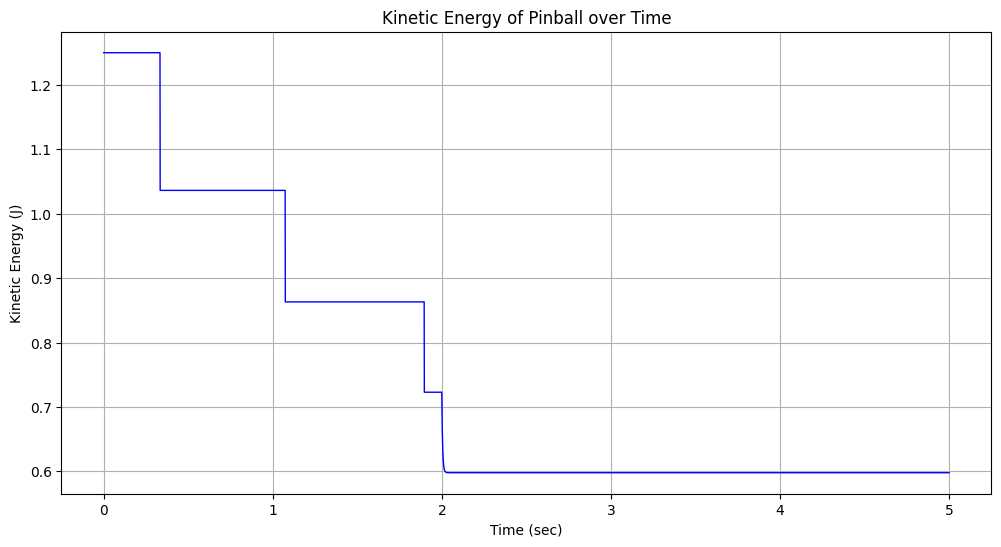

Initial Kinetic Energy: 1.2500 J
Final Kinetic Energy: 0.5979 J
Energy Lost: 0.6521 J
Percentage Lost: 52.17%


In [24]:
kin_energy = np.zeros(N)

# Write your code: Compute kinetic energy of the ball and plot
mass = 1.0  # kg (assuming unit mass)
for i in range(N):
    kin_energy[i] = 0.5 * mass * (v_hist[i, 0]**2 + v_hist[i, 1]**2)

# Plot kinetic energy
plt.figure(figsize=(12, 6))
plt.plot(t_hist, kin_energy, 'b-', linewidth=1)
plt.xlabel('Time (sec)')
plt.ylabel('Kinetic Energy (J)')
plt.title('Kinetic Energy of Pinball over Time')
plt.grid(True)
plt.show()

# Print statistics
print(f"Initial Kinetic Energy: {kin_energy[0]:.4f} J")
print(f"Final Kinetic Energy: {kin_energy[-1]:.4f} J")
print(f"Energy Lost: {kin_energy[0] - kin_energy[-1]:.4f} J")
print(f"Percentage Lost: {100 * (kin_energy[0] - kin_energy[-1]) / kin_energy[0]:.2f}%")

Put your answer here: The ball loses energy through collisions with the walls. Each sudden drop in the kinetic energy plot represents a collision, where energy is lost because the coefficient of restitution (γ = 0.9) is less than 1. Between collisions, the energy stays constant since there's no friction.The size of each energy drop depends on the collision angle - perpendicular hits lose more energy than glancing hits. Over time, these repeated collisions cause the ball to gradually slow down, which is why the overall kinetic energy decreases throughout the simulation. This is similar to how a real bouncing ball eventually stops bouncing.Claude can make mistakes. Please double-check responses.

# Q.3 [40 pts] Swing Stick
<img src="https://github.com/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Figures/SwingArm.png?raw=true" width="500">

## Q.3.(a) [20 pts] Implement a swing stick simulation.
Use parameters, [$m, I, c, l, \mu, dt$] = [1, 0.05, 0.5, 1.0, 0, 0.001].

Simulate the case when [$\theta_0, \dot{\theta}_0$] = [0, 0] and $F$ is applied at the tip of the arm during 0.05 sec to the vertical direction.


In [34]:
def sim_step(theta, theta_dot, F, tau , params=None):
  m, I, c, l, mu, dt = params
  # Write your code:
  # 1) implement dynamics to compute the angular acceleration
  # 2) Semi-implciti Euler integration
  g = 9.8

  # Torque from gravity (acts at center of mass c from pivot)
  tau_gravity = -m * g * c * np.sin(theta)

  # Torque from external vertical force at tip
  # Moment arm = l * cos(theta) for vertical force
  tau_external = F * l * np.cos(theta)

  # Torque from friction
  tau_friction = -mu * theta_dot

  # Total torque
  tau_total = tau_gravity + tau_external + tau_friction + tau

  # Angular acceleration: I * alpha = tau
  theta_ddot = tau_total / I

  # Semi-implicit Euler integration
  th_dot = theta_dot + theta_ddot * dt
  th = theta + th_dot * dt
  return [th, th_dot]

def simulate_stick(theta=0, theta_dot=0, F=50, tau=0, F_duration=0.05, F_start_time=0.0, T=1.0, params=None):
  dt = params[-1]
  ts = np.linspace(0, T, int(T/dt))
  theta_hist = [theta]
  theta_dot_hist = [theta_dot]

  # Write your code: Implement the case that the external force pushes the tip of the arm
  for i in range(1, len(ts)):
    t = ts[i]

    # Apply force only during specified duration
    if F_start_time <= t <= (F_start_time + F_duration):
      F_current = F
    else:
      F_current = 0

    # Step simulation
    [theta, theta_dot] = sim_step(theta, theta_dot, F_current, tau, params)

    theta_hist.append(theta)
    theta_dot_hist.append(theta_dot)
  #...
  return [theta_hist, theta_dot_hist, ts]

In [35]:
# Visualization code: No need to change
def plot_stick(q, ts, params, num_frames= 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)
  m, I, c, l, mu, dt = params
  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects
  txt_title = ax.set_title('')

  ax.set_xlim(( -2.5, 2.5))    # Canvas size
  ax.set_ylim((-2.5, 2.5))
  txt_title = ax.set_title('')
  interval = len(q)//num_frames

  def drawFrame(k):
    k = interval*k
    q0 = q[k]
    rA = [l*np.cos(q0), l*np.sin(q0)]
    x1 = 0
    x2 = rA[0]
    y1 = 0
    y2 = rA[1]
    link1.set_data([x1, x2], [y1, y2])
    txt_title.set_text('t = {:.2f} sec'.format(ts[k]))
    return link1,

  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [36]:
# Let's use param: [mass, Inertia, CoM, length, friction coefficient, delta_t]
# Put your code: Run simulation
params=[1, 0.05, 0.5, 1.0, 0.0, 0.001]
[theta_hist, theta_dot_hist, ts] = simulate_stick(theta=0, theta_dot=0, F=50, tau=0, F_duration=0.05, F_start_time=0.0, T=2.0, params=params)

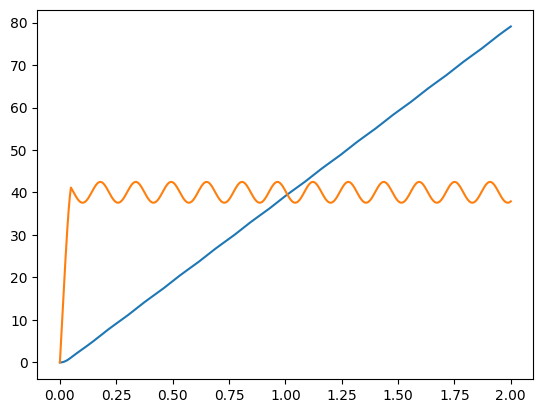

In [37]:
# Joint position and velocity plots (No need to change)
plt.plot(ts, theta_hist)
plt.plot(ts, theta_dot_hist)
plt.show()

In [38]:
anim = plot_stick(theta_hist, ts, params)
plt.close()
HTML(anim.to_html5_video())

## Q.3.(b) [5 pts] What is the joint angle and velocity after 0.5, 1.0, 1.5 sec?

In [39]:
# Write your code: Print the angular position and velocity of the arm @ 0.5, 1, 1.5 sec
index_05sec = int(0.5 / params[-1])
index_1sec = int(1.0 / params[-1])
index_15sec = int(1.5 / params[-1])

print("At t = 0.5 sec:")
print(f"  Angle (theta): {theta_hist[index_05sec]:.4f} rad ({np.degrees(theta_hist[index_05sec]):.2f} degrees)")
print(f"  Angular velocity: {theta_dot_hist[index_05sec]:.4f} rad/s")
print()
print("At t = 1.0 sec:")
print(f"  Angle (theta): {theta_hist[index_1sec]:.4f} rad ({np.degrees(theta_hist[index_1sec]):.2f} degrees)")
print(f"  Angular velocity: {theta_dot_hist[index_1sec]:.4f} rad/s")
print()
print("At t = 1.5 sec:")
print(f"  Angle (theta): {theta_hist[index_15sec]:.4f} rad ({np.degrees(theta_hist[index_15sec]):.2f} degrees)")
print(f"  Angular velocity: {theta_dot_hist[index_15sec]:.4f} rad/s")
# ...

At t = 0.5 sec:
  Angle (theta): 19.1510 rad (1097.27 degrees)
  Angular velocity: 42.3995 rad/s

At t = 1.0 sec:
  Angle (theta): 39.1966 rad (2245.80 degrees)
  Angular velocity: 40.3440 rad/s

At t = 1.5 sec:
  Angle (theta): 59.1698 rad (3390.18 degrees)
  Angular velocity: 37.9628 rad/s


## Q.3. (c) [15 pts] Compute the torque to hold the position of the stick (i.e., $\dot{\theta} = 0$) when $F = 50$N at the three following position
### (i) $\theta=0$, $\theta=\frac{\pi}{4}$, and $\theta=\frac{\pi}{6}$
### (ii) Simulate the robot at the configuration in (i) and check whether the stick moves or not.

(i) Required torques to hold the stick stationary:
θ = 0 (0.00°):
  Torque from gravity: -0.0000 N⋅m
  Torque from force F: 50.0000 N⋅m
  Required holding torque: -50.0000 N⋅m

θ = π/4 (45.00°):
  Torque from gravity: -3.4648 N⋅m
  Torque from force F: 35.3553 N⋅m
  Required holding torque: -31.8905 N⋅m

θ = π/6 (30.00°):
  Torque from gravity: -2.4500 N⋅m
  Torque from force F: 43.3013 N⋅m
  Required holding torque: -40.8513 N⋅m


(ii) Simulating with computed holding torques:

θ = 0 (0.00°):
  Applied holding torque: -50.0000 N⋅m
  Initial angle: 0.0000 rad
  Final angle: 0.0000 rad
  Angle change: 0.000000 rad
  Final angular velocity: 0.000000 rad/s
  ✓ Stick remains stationary (successfully held)

θ = π/4 (45.00°):
  Applied holding torque: -31.8905 N⋅m
  Initial angle: 0.7854 rad
  Final angle: 0.7854 rad
  Angle change: 0.000000 rad
  Final angular velocity: 0.000000 rad/s
  ✓ Stick remains stationary (successfully held)

θ = π/6 (30.00°):
  Applied holding torque: -40.8513 N⋅m


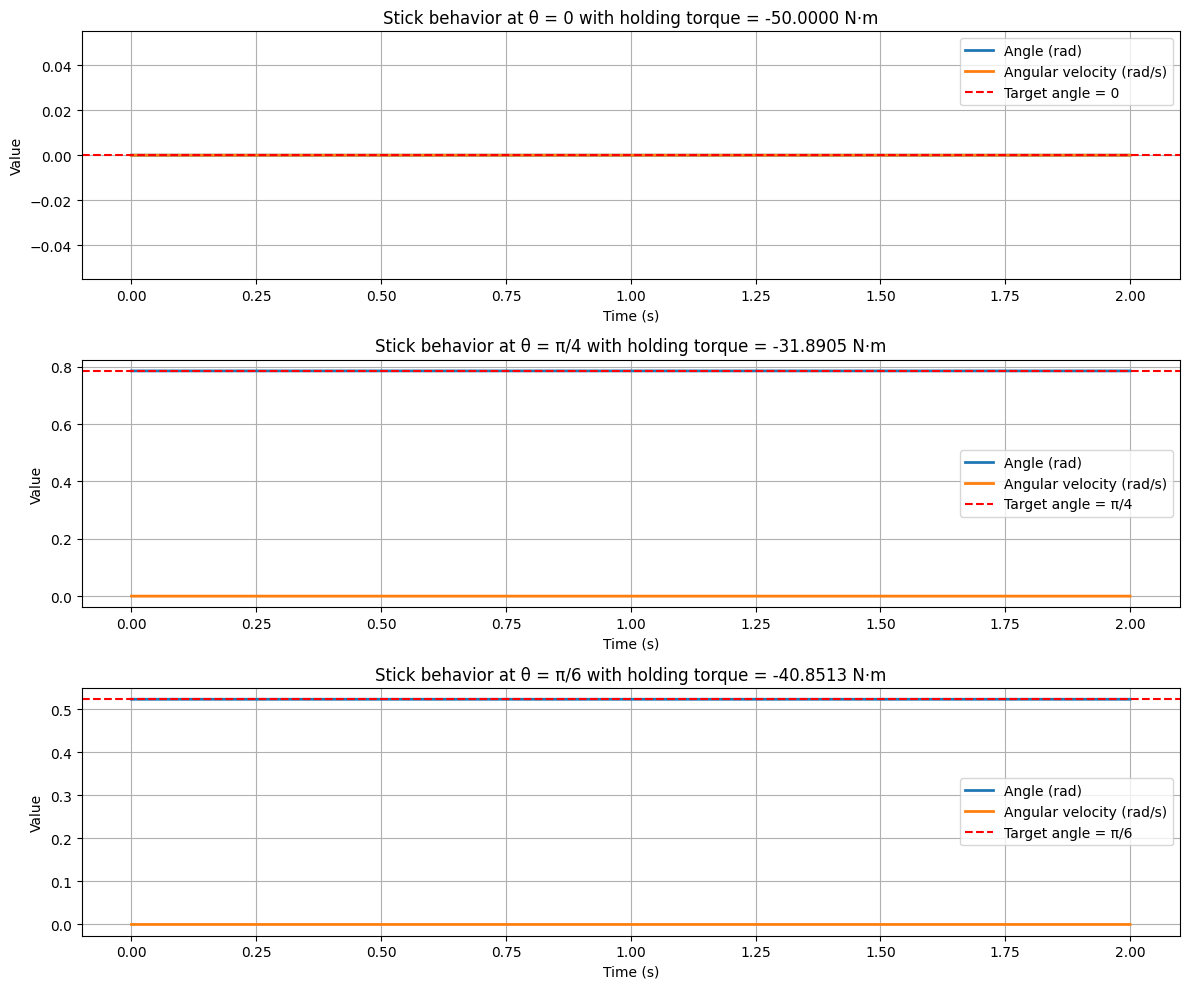

In [42]:
_, _, _, l, _, _ = params

# Write your code: Compute the torque to hold the motion of the arm
m, I, c, l, mu, dt = params
g = 9.8
F = 50

# Three positions to test
theta_positions = [0, np.pi/4, np.pi/6]
theta_names = ["0", "π/4", "π/6"]

print("(i) Required torques to hold the stick stationary:")
print("=" * 60)

required_torques = []
for idx, theta_temp in enumerate(theta_positions):
    # For equilibrium (theta_dot = 0, theta_ddot = 0):
    # tau_total = 0
    # tau_hold + tau_gravity + tau_external = 0
    # tau_hold = -(tau_gravity + tau_external)

    tau_gravity = -m * g * c * np.sin(theta_temp)
    tau_external = F * l * np.cos(theta_temp)
    tau_hold = -(tau_gravity + tau_external)

    required_torques.append(tau_hold)

    print(f"θ = {theta_names[idx]} ({np.degrees(theta_temp):.2f}°):")
    print(f"  Torque from gravity: {tau_gravity:.4f} N⋅m")
    print(f"  Torque from force F: {tau_external:.4f} N⋅m")
    print(f"  Required holding torque: {tau_hold:.4f} N⋅m")
    print()

print("\n(ii) Simulating with computed holding torques:")
print("=" * 60)

# Simulate each configuration
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for idx, (theta_temp, tau_hold) in enumerate(zip(theta_positions, required_torques)):
    # Simulate with holding torque
    [theta_hist_hold, theta_dot_hist_hold, ts_hold] = simulate_stick(
        theta=theta_temp, theta_dot=0, F=50, tau=tau_hold,
        F_duration=2.0, F_start_time=0.0, T=2.0, params=params
    )

    # Plot results
    axes[idx].plot(ts_hold, theta_hist_hold, label='Angle (rad)', linewidth=2)
    axes[idx].plot(ts_hold, theta_dot_hist_hold, label='Angular velocity (rad/s)', linewidth=2)
    axes[idx].axhline(y=theta_temp, color='r', linestyle='--', label=f'Target angle = {theta_names[idx]}')
    axes[idx].set_xlabel('Time (s)')
    axes[idx].set_ylabel('Value')
    axes[idx].set_title(f'Stick behavior at θ = {theta_names[idx]} with holding torque = {tau_hold:.4f} N⋅m')
    axes[idx].legend()
    axes[idx].grid(True)

    # Check if stick moved
    angle_change = abs(theta_hist_hold[-1] - theta_temp)
    velocity_final = abs(theta_dot_hist_hold[-1])

    print(f"\nθ = {theta_names[idx]} ({np.degrees(theta_temp):.2f}°):")
    print(f"  Applied holding torque: {tau_hold:.4f} N⋅m")
    print(f"  Initial angle: {theta_temp:.4f} rad")
    print(f"  Final angle: {theta_hist_hold[-1]:.4f} rad")
    print(f"  Angle change: {angle_change:.6f} rad")
    print(f"  Final angular velocity: {velocity_final:.6f} rad/s")

    if angle_change < 0.001 and velocity_final < 0.001:
        print(f"  ✓ Stick remains stationary (successfully held)")
    else:
        print(f"  ✗ Stick moved (holding failed)")

plt.tight_layout()
plt.show()

# Define theta and tau for the test cell below (using first configuration as example)
theta = theta_positions[0]
tau = required_torques[0]

#...

In [43]:
# Test your torque: The arm should not move
[theta_hist, theta_dot_hist, ts] = simulate_stick(theta=theta, theta_dot=0, F=50, tau=tau, F_duration=1.0, F_start_time=0.0, T=1.0, params=params)
anim = plot_stick(theta_hist, ts, params)
plt.close()
HTML(anim.to_html5_video())